In [168]:
import numpy as np

In [169]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [170]:
# create 3x3 boolean array with all values is True
np.full(shape=(3, 3), fill_value=True)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [171]:
# example for apply function along axis
test = np.arange(10).reshape((2, 5))
test

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [172]:
np.apply_along_axis(func1d=np.mean, arr=test, axis=0)

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [173]:
test = np.arange(27).reshape((3, 3, 3))
test

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [174]:
np.apply_along_axis(func1d=np.mean, arr=test, axis=2)

array([[ 1.,  4.,  7.],
       [10., 13., 16.],
       [19., 22., 25.]])

In [175]:
# Bai tap xu ly anh, chuyen anh mau thanh anh xam.
# Phat bieu bai toan: Chung ta co 3 phuong phap de tinh gia tri chuyen doi
# PP1: tinh gia tri trung binh cua gia tri lon nhat va gia tri nho nhat trong kenh mau.
# PP2: tinh gia tri trung binh cua 3 kenh mau: (R + G + B)/ 3
# PP3: nhan he so tuong ung cua 3 kenh mau nhu sau: 0.21*R + 0.72*G + O.o7*B

In [176]:
import cv2
import matplotlib.pyplot as plt

In [177]:
def showImage(img, is_gray = False):
    plt.imshow(img, cmap='gray' if is_gray else None)
    plt.axis('off')
    plt.show()

def solution1(channels):
    return (np.min(channels) + np.max(channels)) / 2

def solution2(channels):
    return int(np.mean(channels))

def solution3(channels):
    return int(0.21*channels[0] + 0.72*channels[1] + 0.07*channels[2])

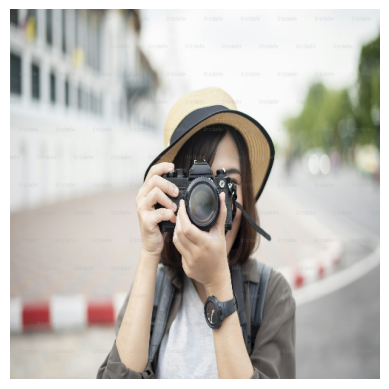

In [178]:
img = cv2.imread('1.jpg')

img = cv2.resize(src=img, dsize=(500, 500))

img = img[:,:,::-1]

showImage(img)

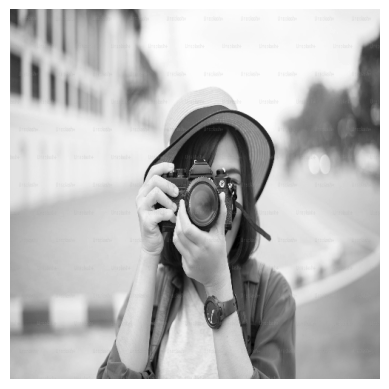

In [179]:
img_1 = img.astype(float)
img_1 = np.apply_along_axis(arr=img_1, func1d=solution1, axis=2)
img_1 = img_1.astype(np.uint8)

showImage(img_1, is_gray=True)

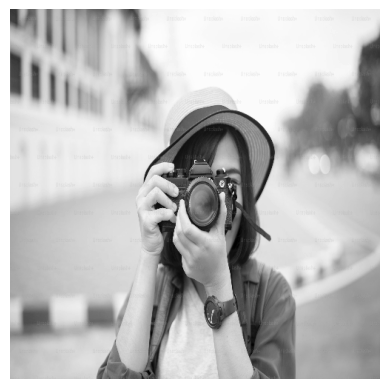

In [180]:
img_2 = img.astype(float)
img_2 = np.apply_along_axis(arr=img_2, func1d=solution2, axis=2)
img_2 = img_2.astype(np.uint8)

showImage(img_2, is_gray=True)

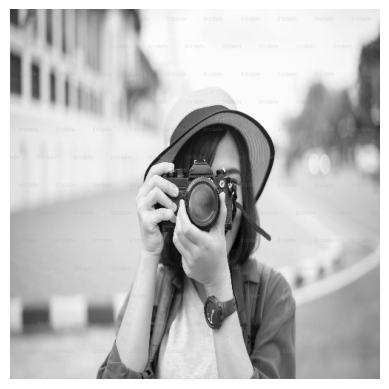

In [181]:
img_3 = img.astype(float)
img_3 = np.apply_along_axis(arr=img_3, func1d=solution3, axis=2)
img_3 = img_3.astype(np.uint8)

showImage(img_3, is_gray=True)

In [182]:
cv2.imwrite('grayscale_image.jpg', img=img_3)

True

In [183]:
import pandas as pd

In [186]:
df = pd.read_csv('data/advertise.csv')
df

,tv,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [188]:
# convert pd.DataFrame to NumPy array
arr = df.to_numpy()
arr

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

In [198]:
print('Max values in Sales column:', np.max(arr[:,-1]))
print('Index of max value in Sales column:', np.argmax(arr[:,-1]))

Max values in Sales column: 22.1
Index of max value in Sales column: 0


In [199]:
print('Mean value of TV column:', np.mean(arr[:,0]))

Mean value of TV column: 124.82000000000001


In [205]:
indices = np.where(arr[:,-1] >= 15)[0]
np.mean(arr[indices][:,1])

29.966666666666665